In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
import numpy as np
from math import sqrt
import dtale  
import utils

In [2]:
df = pd.read_csv("../heart.csv")
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=False)
df_encoded = df_encoded[df_encoded['RestingBP'] != 0]
df_encoded = df_encoded[df_encoded['Cholesterol'] != 0]


In [3]:
import numpy as np 




columns_to_drop = [
    'HeartDisease',      
    'Sex_F',             
    'ExerciseAngina_N'
] 

# Créer votre jeu de features X
X = df_encoded.drop(columns=columns_to_drop, errors='ignore').copy()





In [4]:
X

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,True,False,True,False,False,False,True,False,False,False,False,True
1,49,160,180,0,156,1.0,False,False,False,True,False,False,True,False,False,False,True,False
2,37,130,283,0,98,0.0,True,False,True,False,False,False,False,True,False,False,False,True
3,48,138,214,0,108,1.5,False,True,False,False,False,False,True,False,True,False,True,False
4,54,150,195,0,122,0.0,True,False,False,True,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,True,False,False,False,True,False,True,False,False,False,True,False
914,68,144,193,1,141,3.4,True,True,False,False,False,False,True,False,False,False,True,False
915,57,130,131,0,115,1.2,True,True,False,False,False,False,True,False,True,False,True,False
916,57,130,236,0,174,0.0,False,False,True,False,False,True,False,False,False,False,True,False


<h2> Normaliser les variables numériques

In [5]:

# 1. Définition des colonnes quantitatives
quantitative_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
# quantitative_cols= list(X)
original_categorical = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'FastingBS']
categorical_cols = [col for col in X.columns if any(cat in col for cat in original_categorical)]
print(len(categorical_cols)+ len(quantitative_cols))

# 3. Application de la transformation
X_scaled_selective = utils.scaleData(X, quantitative_cols)


18


<h2> PCA 

<h3> 2 Dims

--- Analyse de la Variance Expliquée ---
Variance expliquée par la Composante Principale 1 (CP1): 28.7 %
Variance expliquée par la Composante Principale 2 (CP2): 14.0 %
Variance cumulée (CP1 + CP2): 42.8 %
------------------------------------------------------------


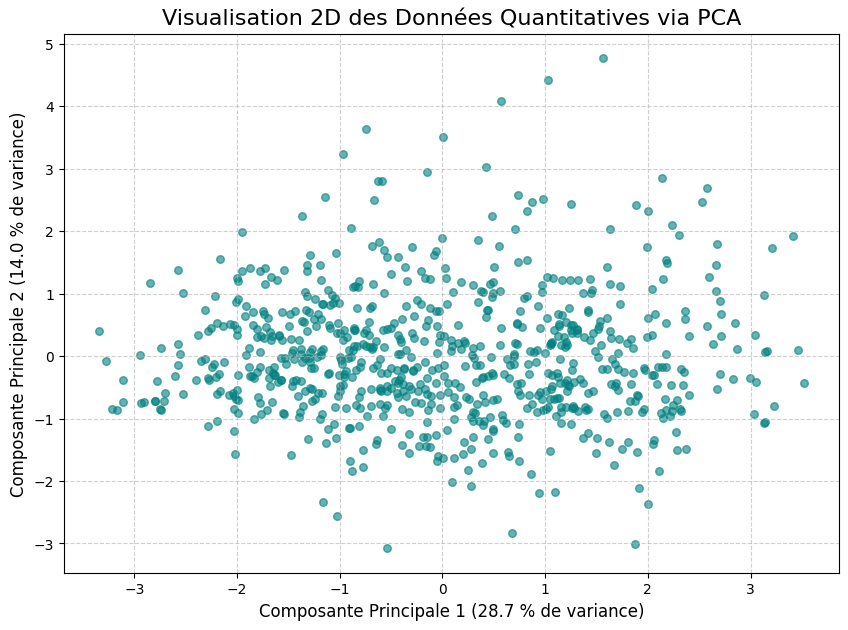

In [6]:
from sklearn.decomposition import PCA
X_pca = utils.showPCA2dim(X_scaled_selective)


<h3>Réduction de dimensions en conservant 90% de l'information

In [7]:
# 1. Instanciation de la PCA pour conserver 90% de la variance
X_reduced = utils.reducedPcaWith90(X_scaled_selective)

--- Réduction de Dimension (PCA pour 90% de Variance) ---
Nombre initial de features : 18
Nombre de Composantes Principales (CP) retenues pour 90% : 9
Variance cumulée expliquée : 90.13 %
------------------------------------------------------------
Forme du nouvel ensemble de features : (746, 9)

Premières lignes de l'espace réduit (X_reduced) :
[[-1.95149918e+00  1.36943055e+00  2.87750139e-01  4.02196933e-01
  -5.96734092e-01  3.24839260e-01 -7.40846235e-02 -2.86732283e-01
   3.19046421e-01]
 [-1.69180767e-01 -9.15952025e-02  1.62355417e+00  1.05259475e+00
  -5.20297103e-01  2.16062794e-01  8.76492512e-01  1.04378372e+00
   1.32621976e-03]
 [-7.46338953e-01  1.60620507e-01 -6.86077973e-01 -1.06207663e+00
  -1.90583658e+00 -2.56830883e-01 -1.67077148e+00  5.17883951e-01
   6.48020240e-01]
 [ 1.02778616e+00 -8.18765631e-01 -3.88897675e-01  2.73838460e-01
  -1.29012005e+00  8.06111738e-02  2.32912207e-01  5.24271921e-02
   1.11596231e-01]
 [-2.21179961e-01 -4.54012335e-01  1.44581408e+0

In [8]:
df_pca = pd.DataFrame(
    data=X_pca,
    columns=['CP1', 'CP2']
)
df_pca["HeartDisease"] = df_encoded["HeartDisease"].copy()

<h2> ONLY PCA

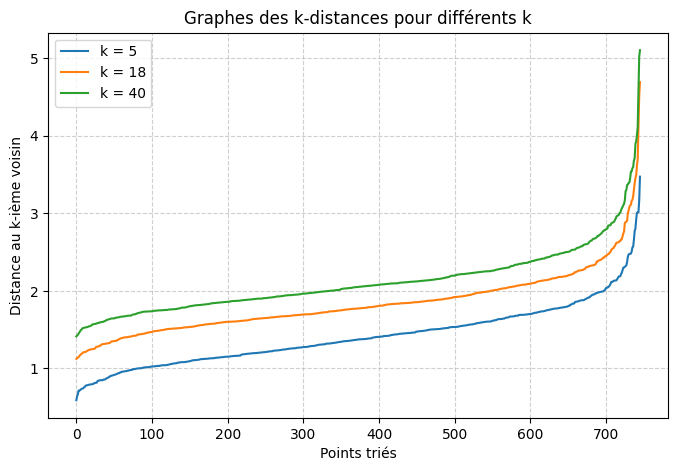

In [9]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Suppose que X_reduced contient tes données après PCA
k_values = [5, 18, 40]
plt.figure(figsize=(8, 5))

for k in k_values:
    neighbors = NearestNeighbors(n_neighbors=k)
    neighbors_fit = neighbors.fit(X_reduced)
    distances, indices = neighbors_fit.kneighbors(X_reduced)
    
    # On trie les distances au k-ième voisin
    distances = np.sort(distances[:, -1])
    plt.plot(distances, label=f'k = {k}')

plt.title("Graphes des k-distances pour différents k")
plt.xlabel("Points triés")
plt.ylabel("Distance au k-ième voisin")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


Recherche d'hyperparamètres 

In [10]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

best_params = {}
best_silhouette = -np.inf

for eps in np.arange(0.5, 2, 0.01):  # de 1.5 à 2.5 inclus
    for min in range(5,32):
        db = DBSCAN(eps=eps, min_samples=min).fit(X_reduced)
        labels = db.labels_
        
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        noise_ratio = list(labels).count(-1) / len(labels)
        
        # Calcul du score de silhouette uniquement si plusieurs clusters
        if n_clusters > 1:
            silhouette = silhouette_score(X_reduced, labels)
            if silhouette > best_silhouette:
                best_silhouette = silhouette
                best_params["eps"] = eps
                best_params["min"] = min
            print(f"eps={eps:.1f}, clusters={n_clusters}, bruit={noise_ratio:.2f}, silhouette={silhouette:.3f}")
        else:
            print(f"eps={eps:.1f}, clusters={n_clusters}, bruit={noise_ratio:.2f}, silhouette=NA")


print(f"{best_params}")


eps=0.5, clusters=0, bruit=1.00, silhouette=NA
eps=0.5, clusters=0, bruit=1.00, silhouette=NA
eps=0.5, clusters=0, bruit=1.00, silhouette=NA
eps=0.5, clusters=0, bruit=1.00, silhouette=NA
eps=0.5, clusters=0, bruit=1.00, silhouette=NA
eps=0.5, clusters=0, bruit=1.00, silhouette=NA
eps=0.5, clusters=0, bruit=1.00, silhouette=NA
eps=0.5, clusters=0, bruit=1.00, silhouette=NA
eps=0.5, clusters=0, bruit=1.00, silhouette=NA
eps=0.5, clusters=0, bruit=1.00, silhouette=NA
eps=0.5, clusters=0, bruit=1.00, silhouette=NA
eps=0.5, clusters=0, bruit=1.00, silhouette=NA
eps=0.5, clusters=0, bruit=1.00, silhouette=NA
eps=0.5, clusters=0, bruit=1.00, silhouette=NA
eps=0.5, clusters=0, bruit=1.00, silhouette=NA
eps=0.5, clusters=0, bruit=1.00, silhouette=NA
eps=0.5, clusters=0, bruit=1.00, silhouette=NA
eps=0.5, clusters=0, bruit=1.00, silhouette=NA
eps=0.5, clusters=0, bruit=1.00, silhouette=NA
eps=0.5, clusters=0, bruit=1.00, silhouette=NA
eps=0.5, clusters=0, bruit=1.00, silhouette=NA
eps=0.5, clus

In [17]:

eps = best_params["eps"]
min_sample = best_params["min"]

# Application du meilleur modèle DBSCAN
dbscan_final = DBSCAN(eps=1.78, min_samples=38)
clusters_final = dbscan_final.fit_predict(X_reduced)
# -------------------------------------------------------------------------

utils.cluster_summary(clusters_final, df_encoded)

taille df_cluster : (746, 22)
         Total_Points  Nb_Malades Taux_Maladie
Cluster                                       
-1                201         104       51.74%
 0                268         221       82.46%
 1                277          31       11.19%


<Axes: xlabel='CP1', ylabel='CP2'>

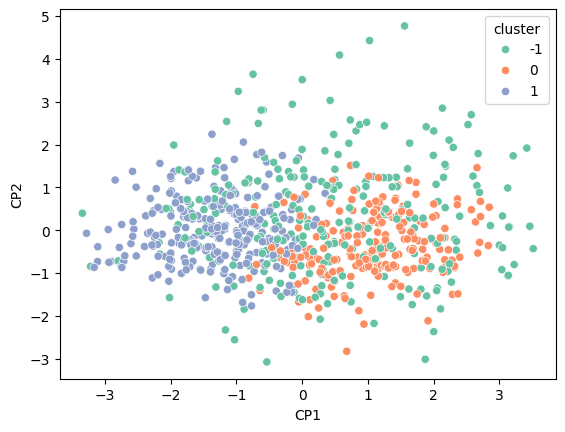

In [14]:
df_pca["cluster"] = clusters_final

sns.scatterplot(data=df_pca, x="CP1", y="CP2", hue="cluster", palette="Set2")


<h2> t-SNE

/Users/joubrane/Desktop/COURS/M2/DM/projet/datamining/code/utils.py:62: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



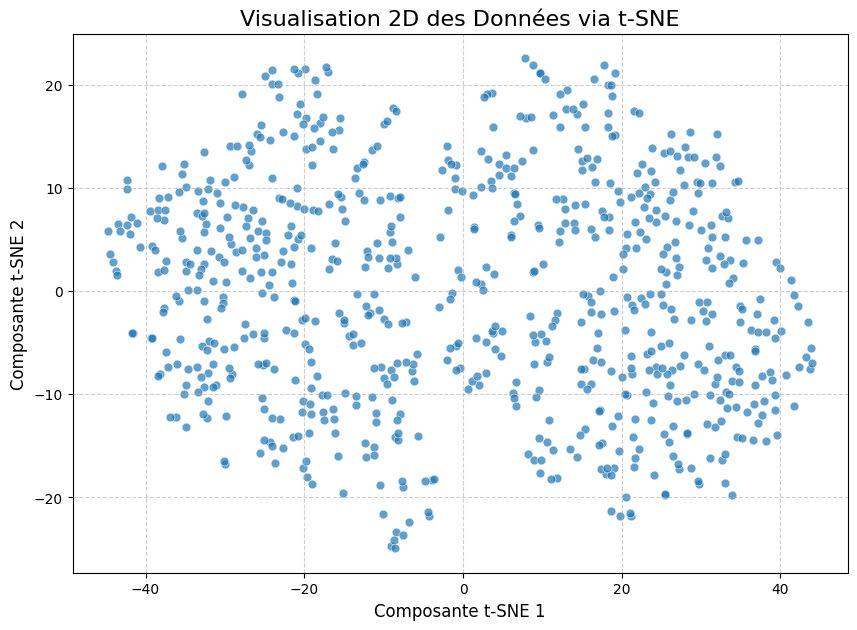

In [18]:
# 1. Réduction de Dimension avec t-SNE
# 30 p
X_tsne = utils.showTSNE(X_reduced)

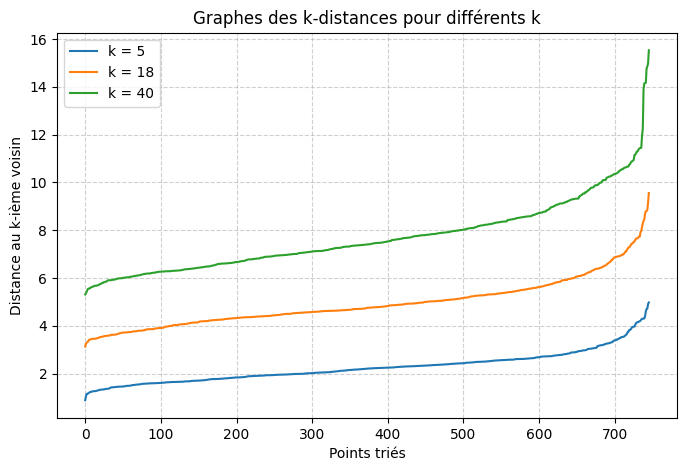

In [19]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

k_values = [5, 18, 40]
plt.figure(figsize=(8, 5))

for k in k_values:
    neighbors = NearestNeighbors(n_neighbors=k)
    neighbors_fit = neighbors.fit(X_tsne)
    distances, indices = neighbors_fit.kneighbors(X_tsne)
    
    # On trie les distances au k-ième voisin
    distances = np.sort(distances[:, -1])
    plt.plot(distances, label=f'k = {k}')

plt.title("Graphes des k-distances pour différents k")
plt.xlabel("Points triés")
plt.ylabel("Distance au k-ième voisin")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [20]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

best_params = {}
best_silhouette = -np.inf

for eps in np.arange(5.8, 8., 0.01):  # de 1.5 à 2.5 inclus
    for min in range(36,46):
        db = DBSCAN(eps=eps, min_samples=min).fit(X_tsne)
        labels = db.labels_
        
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        noise_ratio = list(labels).count(-1) / len(labels)
        
        # Calcul du score de silhouette uniquement si plusieurs clusters
        if n_clusters > 1:
            silhouette = silhouette_score(X_reduced, labels)
            if silhouette > best_silhouette:
                best_silhouette = silhouette
                best_params["eps"] = eps
                best_params["min"] = min
            print(f"eps={eps:.1f}, clusters={n_clusters}, bruit={noise_ratio:.2f}, silhouette={silhouette:.3f}")
        else:
            print(f"eps={eps:.1f}, clusters={n_clusters}, bruit={noise_ratio:.2f}, silhouette=NA")


print(f"Best score : {best_silhouette} avec {best_params}")


eps=5.8, clusters=3, bruit=0.57, silhouette=0.018
eps=5.8, clusters=4, bruit=0.60, silhouette=-0.027
eps=5.8, clusters=3, bruit=0.69, silhouette=-0.024
eps=5.8, clusters=3, bruit=0.71, silhouette=-0.035
eps=5.8, clusters=3, bruit=0.72, silhouette=-0.046
eps=5.8, clusters=3, bruit=0.76, silhouette=-0.061
eps=5.8, clusters=2, bruit=0.85, silhouette=-0.100
eps=5.8, clusters=1, bruit=0.91, silhouette=NA
eps=5.8, clusters=1, bruit=0.94, silhouette=NA
eps=5.8, clusters=0, bruit=1.00, silhouette=NA
eps=5.8, clusters=3, bruit=0.57, silhouette=0.018
eps=5.8, clusters=4, bruit=0.60, silhouette=-0.027
eps=5.8, clusters=3, bruit=0.68, silhouette=-0.021
eps=5.8, clusters=3, bruit=0.70, silhouette=-0.031
eps=5.8, clusters=3, bruit=0.72, silhouette=-0.046
eps=5.8, clusters=3, bruit=0.76, silhouette=-0.061
eps=5.8, clusters=2, bruit=0.85, silhouette=-0.100
eps=5.8, clusters=1, bruit=0.91, silhouette=NA
eps=5.8, clusters=1, bruit=0.94, silhouette=NA
eps=5.8, clusters=0, bruit=1.00, silhouette=NA
eps=5.

--- Résultat DBSCAN sur t-SNE ---
Paramètres utilisés: Eps=7.94, MinPts=42
Clusters trouvés: 2
Points de bruit: 22 (2.95 %)

Score silhouette : 0.5628


/Users/joubrane/Desktop/COURS/M2/DM/projet/datamining/code/utils.py:266: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



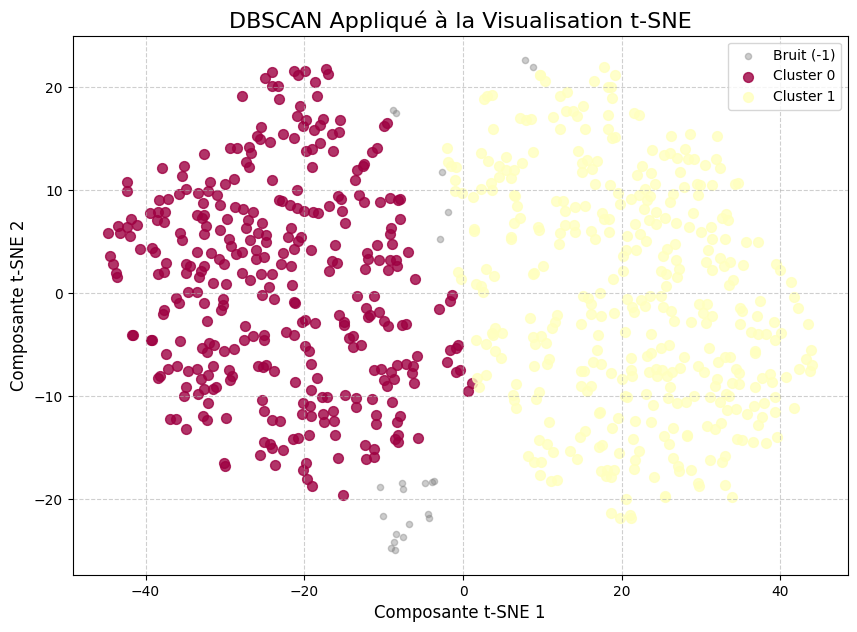

In [21]:
# 1. Paramètres DBSCAN sur Espace t-SNE (2D)

EPS_VALUE = 7.94     
MIN_SAMPLES_VALUE = 42 


clusters_tsne = utils.dbscanOnTSNE(X_tsne, EPS_VALUE, MIN_SAMPLES_VALUE)




In [22]:
# Hypothèse: clusters_tsne contient les étiquettes (-1, 0, 1)
# y_target contient votre variable cible HeartDisease (0 ou 1)

utils.cluster_summary(clusters_tsne, df_encoded)

taille df_cluster : (746, 22)
         Total_Points  Nb_Malades Taux_Maladie
Cluster                                       
-1                 22           8       36.36%
 0                341          40       11.73%
 1                383         308       80.42%


/var/folders/l2/w5lg24zs4mn_sq1t_3gvffcc0000gn/T/ipykernel_55320/1237477064.py:38: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



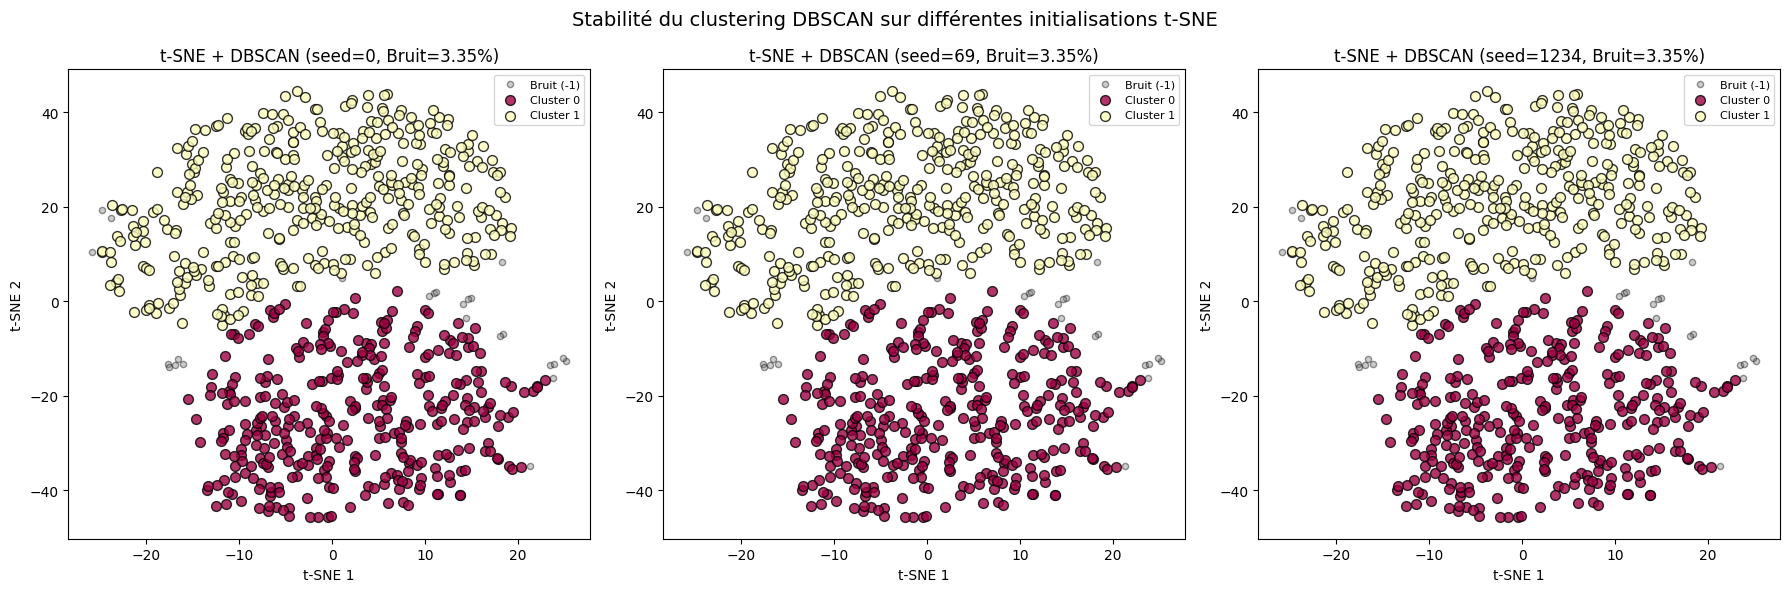

In [23]:
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

# Paramètres DBSCAN
EPS_VALUE = 7.94
MIN_SAMPLES_VALUE = 42

# Trois t-SNE avec seeds différents
random_states = [0, 69, 1234]
tsne_results = []
labels_list = []

for seed in random_states:
    X_tsne = TSNE(
        n_components=2,
        random_state=seed,
        perplexity=30,
        learning_rate=200
    ).fit_transform(X_reduced)
    
    db = DBSCAN(eps=EPS_VALUE, min_samples=MIN_SAMPLES_VALUE)
    labels = db.fit_predict(X_tsne)
    
    tsne_results.append(X_tsne)
    labels_list.append(labels)

# --- Visualisation des 3 résultats côte à côte ---
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, ax in enumerate(axes):
    X_tsne_i = tsne_results[i]
    labels = labels_list[i]
    unique_labels = np.unique(labels)
    
    # Colormap adaptée
    colors = plt.cm.get_cmap('Spectral', len(unique_labels))
    
    for k in unique_labels:
        class_mask = (labels == k)
        xy = X_tsne_i[class_mask]
        
        if k == -1:
            color = 'gray'
            marker_size = 20
            alpha = 0.4
            label_name = 'Bruit (-1)'
        else:
            color = colors(k)
            marker_size = 50
            alpha = 0.8
            label_name = f'Cluster {k}'
        
        ax.scatter(
            xy[:, 0],
            xy[:, 1],
            c=[color],
            s=marker_size,
            alpha=alpha,
            label=label_name,
            edgecolors='k'  # optionnel pour mieux visualiser
        )
    
    # Titre et axes
    bruit_pct = np.round((labels == -1).sum() / len(labels) * 100, 2)
    ax.set_title(f"t-SNE + DBSCAN (seed={random_states[i]}, Bruit={bruit_pct}%)", fontsize=12)
    ax.set_xlabel("t-SNE 1")
    ax.set_ylabel("t-SNE 2")
    ax.legend(fontsize=8)

plt.suptitle("Stabilité du clustering DBSCAN sur différentes initialisations t-SNE", fontsize=14)
plt.tight_layout()
plt.show()


<h2> ISOMAP

In [24]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2, n_neighbors=5)
X_manifold = isomap.fit_transform(X_reduced)


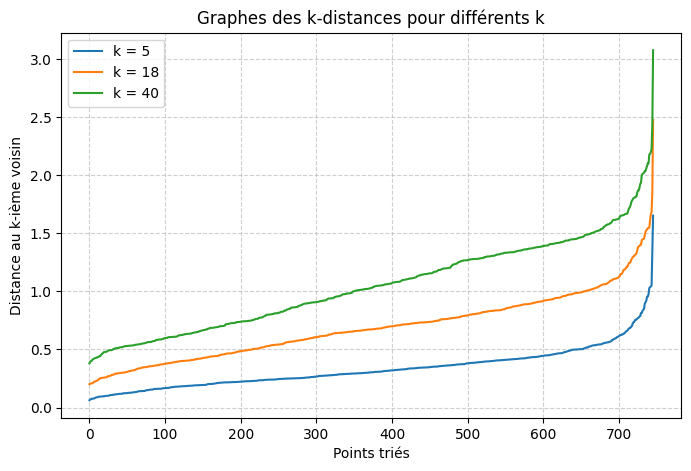

In [25]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Suppose que X_reduced contient tes données après PCA
k_values = [5, 18, 40]
plt.figure(figsize=(8, 5))

for k in k_values:
    neighbors = NearestNeighbors(n_neighbors=k)
    neighbors_fit = neighbors.fit(X_manifold)
    distances, indices = neighbors_fit.kneighbors(X_manifold)
    
    # On trie les distances au k-ième voisin
    distances = np.sort(distances[:, -1])
    plt.plot(distances, label=f'k = {k}')

plt.title("Graphes des k-distances pour différents k")
plt.xlabel("Points triés")
plt.ylabel("Distance au k-ième voisin")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [26]:
from sklearn.cluster import DBSCAN

EPS_VALUE = 0.82
MIN_SAMPLES_VALUE = 18

db = DBSCAN(eps=EPS_VALUE, min_samples=MIN_SAMPLES_VALUE)
clusters_manifold = db.fit_predict(X_manifold)


/var/folders/l2/w5lg24zs4mn_sq1t_3gvffcc0000gn/T/ipykernel_55320/3916465454.py:7: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



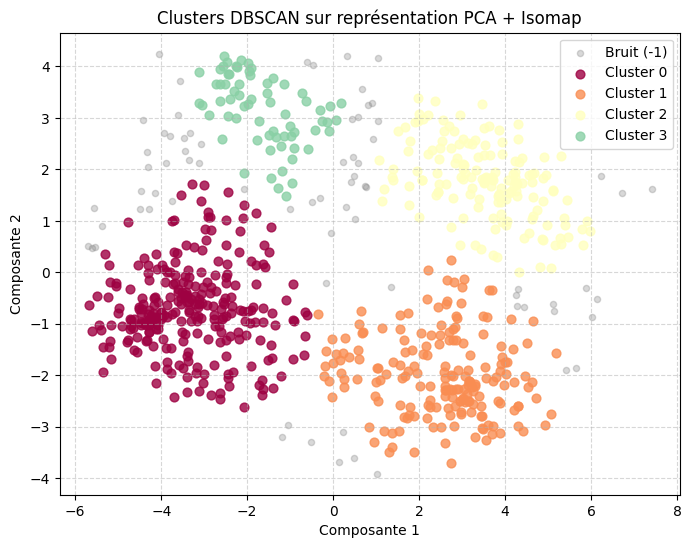

In [27]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8,6))

unique_labels = np.unique(clusters_manifold)
colors = plt.cm.get_cmap('Spectral', len(unique_labels))

for k in unique_labels:
    mask = clusters_manifold == k
    xy = X_manifold[mask]

    if k == -1:
        color = 'gray'
        label = 'Bruit (-1)'
        alpha = 0.3
        size = 20
    else:
        color = colors(k)
        label = f'Cluster {k}'
        alpha = 0.8
        size = 40

    plt.scatter(xy[:, 0], xy[:, 1], c=[color], s=size, alpha=alpha, label=label)

plt.title("Clusters DBSCAN sur représentation PCA + Isomap")
plt.xlabel("Composante 1")
plt.ylabel("Composante 2")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [28]:
utils.cluster_summary(clusters_manifold, df_encoded)

taille df_cluster : (746, 22)
         Total_Points  Nb_Malades Taux_Maladie
Cluster                                       
-1                 73          25       34.25%
 0                266          31       11.65%
 1                188         153       81.38%
 2                152         132       86.84%
 3                 67          15       22.39%


/var/folders/l2/w5lg24zs4mn_sq1t_3gvffcc0000gn/T/ipykernel_55320/2706803305.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/l2/w5lg24zs4mn_sq1t_3gvffcc0000gn/T/ipykernel_55320/2706803305.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/l2/w5lg24zs4mn_sq1t_3gvffcc0000gn/T/ipykernel_55320/2706803305.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/l2/w5lg24zs4mn_sq1t_3gvffcc0000gn/T/ipykernel_55320/2706803305.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign 

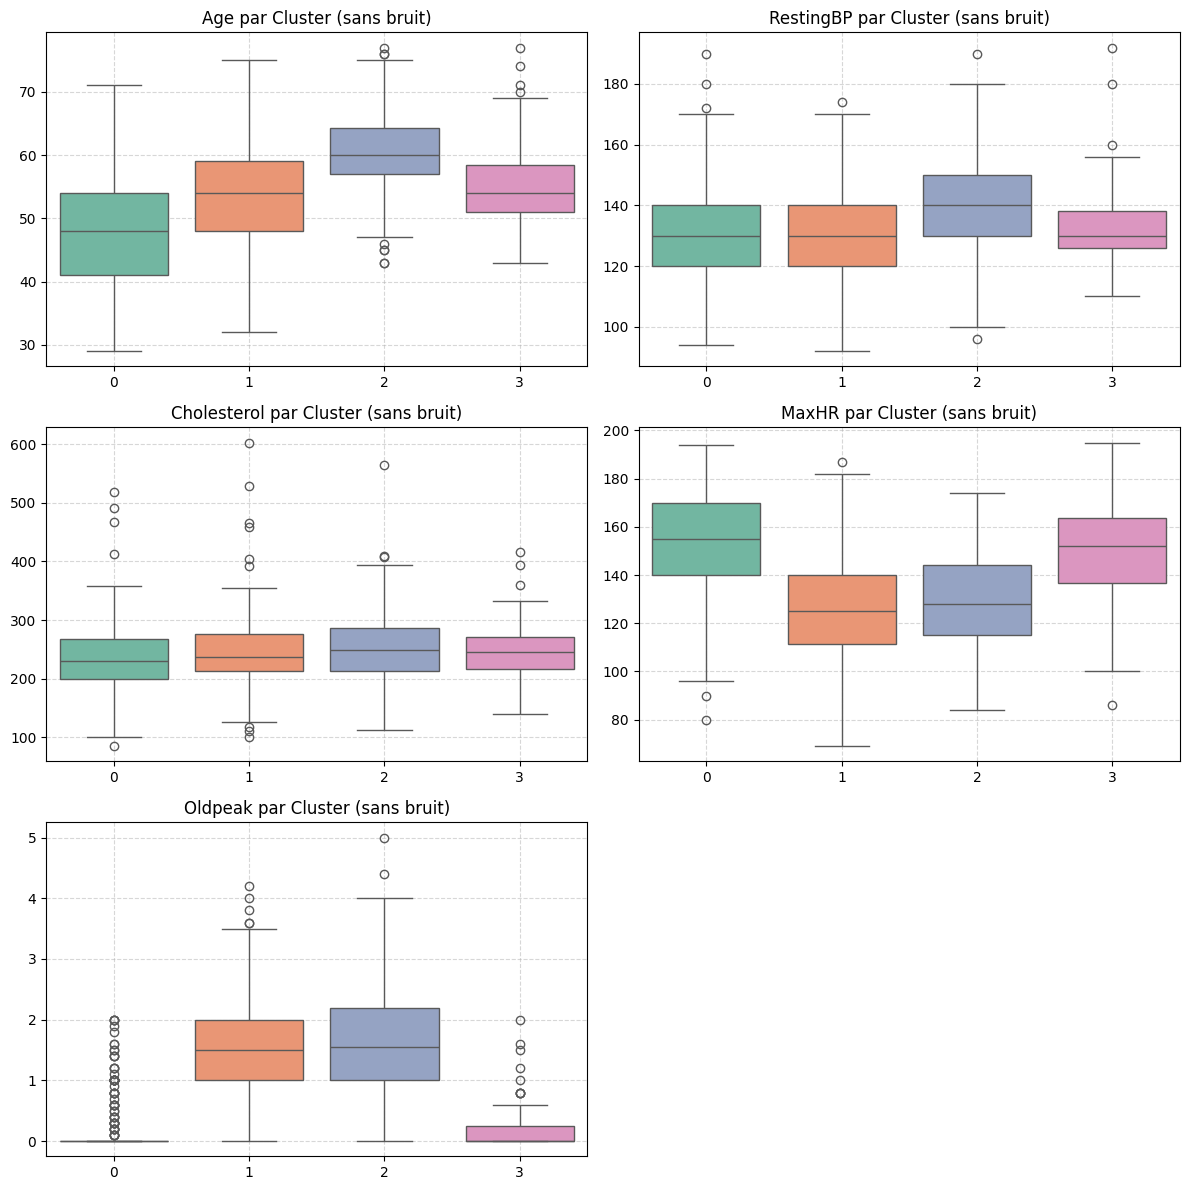

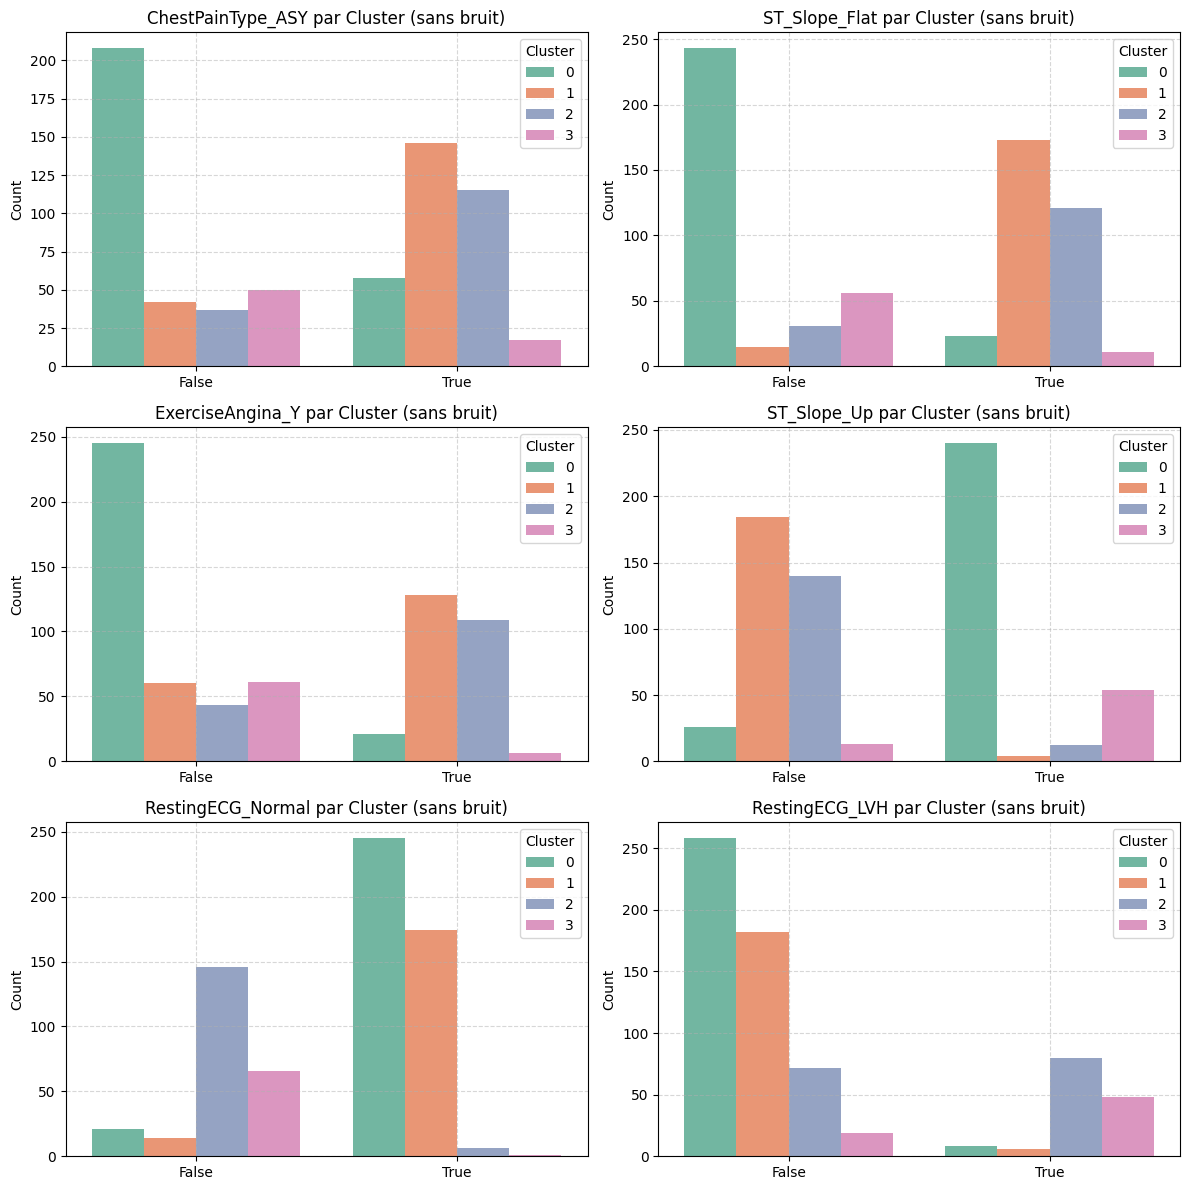

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# DataFrame filtré pour enlever le bruit
df_analysis_no_noise = df_encoded.copy()
df_analysis_no_noise['Cluster'] = clusters_manifold
df_analysis_no_noise = df_analysis_no_noise[df_analysis_no_noise['Cluster'].isin([0, 1, 2, 3])]

# Variables
discriminant_categorical = ['ChestPainType_ASY', 'ST_Slope_Flat', 'ExerciseAngina_Y', 'ST_Slope_Up', "RestingECG_Normal", "RestingECG_LVH"]
quantitative_cols_to_plot = quantitative_cols  # toutes les variables numériques que tu veux

n_cols = 2
n_rows = (len(quantitative_cols_to_plot) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*6, n_rows*4))
axes = axes.flatten()

for i, col in enumerate(quantitative_cols_to_plot):
    sns.boxplot(x='Cluster', y=col, data=df_analysis_no_noise, palette="Set2", ax=axes[i])
    axes[i].set_title(f"{col} par Cluster (sans bruit)")
    axes[i].grid(True, linestyle='--', alpha=0.5)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

for k in range(len(quantitative_cols_to_plot), len(axes)):
    fig.delaxes(axes[k])

plt.tight_layout()
plt.show()


n_cols = 2
n_rows = (len(discriminant_categorical) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*6, n_rows*4))
axes = axes.flatten()

for i, col in enumerate(discriminant_categorical):
    sns.countplot(x=col, hue='Cluster', data=df_analysis_no_noise, palette="Set2", ax=axes[i])
    axes[i].set_title(f"{col} par Cluster (sans bruit)")
    axes[i].grid(True, linestyle='--', alpha=0.5)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")

# Supprimer les axes vides si nécessaire
for j in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
